In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from PIL import Image
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

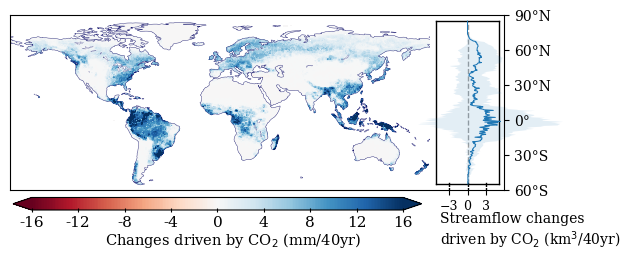

In [2]:
# Calculating the area of each grid
def cal_area():
    lon = [-180+0.5*i for i in range(721)]
    lat = [-90 + 0.5 * i for i in range(361)]
    R = 6371.393
    data = np.zeros((360, 720))
    for i in range(720):
        for j in range(360):
            area = (np.pi/180) * (R**2) * abs(np.sin(lat[j]/180*np.pi) - np.sin(lat[j+1]/180*np.pi)) * abs(lon[i]-lon[i+1])
            data[j, i] = area
    return data

# Plotting Figure 1a and 1b
def Figure_1ab():
    data = xr.open_dataset(r"dataset\CO2_trend.nc")
    co2 = data.CO2.data[:]*40 # Trends multiplied by 40 years

    d = cal_area()
    lat_runoff = np.zeros((14, 360))
    for i in range(14):
        # unit conversion
        d_here = co2[i, :] * d / 1000000
        lat_runoff[i, :] = np.nansum(d_here, axis=1)

    # Plotting b
    fig = plt.figure(figsize=(6.1, 2.5))
    ax = fig.add_axes([0.58, 0.25, 0.35, 0.7])
    ax.patch.set_alpha(0)
    # Calculate the median and standard deviation
    MED = np.median(lat_runoff, axis=0)
    STD = np.std(lat_runoff, axis=0)
    ax.tick_params(top=False, bottom=True,
                   left=False, right=True,
                   labeltop=False, labelbottom=True,
                   labelleft=False, labelright=True)
    # Plots the results for the main area, with the other areas extremely close or at 0.
    ax.plot(MED[70:-10], data.lat.data[70:-10], c='#1f77b4', linewidth=0.75, label='Median', zorder=10)
    ax.fill_betweenx(data.lat.data, MED + STD, MED - STD, alpha=0.12, linewidth=0, color='#1f77b4',
                     label='1 std', zorder=10)
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_ylim([-60, 90])
    ax.set_xlim([-17, 17])

    # Draw the borders and key lines of figure b.
    ax.plot([0, 0], [-55, 85], '--', color='gray', zorder=0, linewidth=1.0, alpha=0.75)
    ax.plot([-5, -5], [-55, 85], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([5, 5], [-55, 85], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([-5, 5], [-55, -55], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([-5, 5], [85, 85], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([-3, -3], [-60, -54], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([-0, -0], [-60, -54], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([3, 3], [-60, -54], '-', color='k', zorder=0, linewidth=1, alpha=1)
    ax.plot([-5, 5], [-57.5, -57.5], '-', color='w', zorder=0, linewidth=0.75, alpha=1)
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    plt.xticks([-3, 0, 3], family='serif', fontsize=9)
    plt.yticks([], family='serif')
    fig.text(0.71, 0.01, "Streamflow changes \ndriven by CO$_2$ (km$^3$/40yr)",
                                  fontfamily='serif', va='bottom', ha='left')


    # Plotting a
    change = data.CO2.data[:14,:]*40
    change = np.nanmedian(change, axis=0)
    proj = ccrs.PlateCarree()
    ax = fig.add_axes([-0.05, 0.25, 0.8, 0.7], projection=proj)
    ax.patch.set_alpha(0)
    colorK = plt.get_cmap('RdBu')(np.linspace(0, 1, 240))
    colorneed = colorK[[i for i in range(240)]]
    im = ax.contourf(
        data.lon.data, data.lat.data, change,
        levels=[-16 + 16 / 120 * i for i in range(241)],
        colors=colorneed, extend='both',
        alpha=1, zorder=10)

    ax.coastlines(resolution='110m', lw=0.3, color='#191970', zorder=12)
    ax.add_feature(cfeature.LAKES, facecolor='white', zorder=12, lw=0.15, edgecolor='#191970')
    ax.set_extent(extents, crs=proj)
    ax.axis('off')
    ax.tick_params(labelsize='small')
    plt.xticks(family='serif')
    plt.yticks(family='serif')

    # Plotting colorbar
    ax4 = fig.add_axes([0.01, 0.17, 0.67, 0.05])
    cbar = fig.colorbar(im, cax=ax4, orientation='horizontal')
    cbar.ax.tick_params(bottom=True, tickdir='inout', pad=2)
    cbar.set_ticks([-16 + i * 4 for i in range(9)])
    cbar.set_ticklabels([int(-16 + i * 4) for i in range(9)], fontsize=11, family='serif')

    fig.text(0.37, 0.05, 'Changes driven by CO$_2$ (mm/40yr)', fontsize=10.5, fontfamily='serif',
             va='center', ha='center')

    ax = fig.add_axes([0.005, 0.25, 0.81, 0.7])
    ax.patch.set_alpha(0)
    ax.set_yticks(np.arange(-90, 90 + 30, 30))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_ylim([-60, 90])
    ax.yaxis.tick_right()
    plt.xticks([])
    plt.yticks(family='serif')

    fig.patch.set_alpha(0)

    plt.tight_layout()
    plt.rcParams['savefig.dpi'] = 3000
    plt.show()

Figure_1ab()

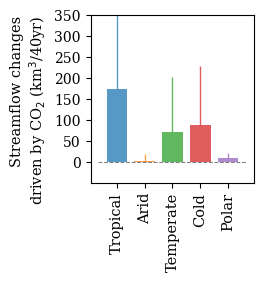

In [3]:
def Figure_1c():
    data = xr.open_dataset(r"dataset\CO2_trend.nc")
    con = xr.open_dataset(r"dataset\Beck_KG_5_classifications.nc")
    con = con.data[:]
    co2 = data.CO2.data[:]*40

    d = cal_area()
    lat_runoff = np.zeros((14, 5))
    for i in range(14):
        d_here = co2[i, :] * d / 1000000
        for j in range(5):
            lat_runoff[i, j] = np.nansum(d_here[con==j+1])

    fig = plt.figure(figsize=(2.5, 2.6))
    ax = fig.add_subplot(111)
    ax.plot([0.3, 5.7], [0, 0], 'k--', zorder=0, alpha=0.5, linewidth=0.75)
    ax.plot([-10, -10], [0, 0], 'k-', zorder=0, alpha=1, linewidth=0.75, label='1 std')
    plt.bar(x=[1, 2, 3, 4, 5], height=np.median(lat_runoff, axis=0), width=0.75,
            alpha=0.75, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
            error_kw={'linewidth': 0.75})
    y = np.median(lat_runoff, axis=0)
    std = np.std(lat_runoff, axis=0)
    color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    for i in [0, 1, 2, 3, 4]:
        ax.errorbar(x=[i+1], y=y[i], yerr=[[0], [std[i]]], color=color[i], linewidth=1, alpha=0.75)

    plt.xlim([0.05, 5.95])
    plt.ylim([-50, 350])
    plt.xticks([1, 2, 3, 4, 5], ['Tropical', 'Arid', 'Temperate', 'Cold', 'Polar'],
               rotation=90,
               family='serif', fontsize=10.5)
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350], family='serif')
    plt.ylabel('Streamflow changes\ndriven by CO$_2$ (km$^3$/40yr)', family='serif',
               fontsize=10.5, loc='top')
    fig.patch.set_alpha(0)
    plt.tight_layout()
    plt.subplots_adjust(
        top=0.995,
        bottom=0.35,
        left=0.335,
        right=0.99,
        hspace=0.2,
        wspace=0.2)
    plt.rcParams['savefig.dpi'] = 3000
    plt.show()

Figure_1c()